In [120]:
import pandas as pd

In [121]:
data = pd.read_csv('Student_Performance.csv')

In [122]:
data.isnull()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [123]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [124]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object':
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
categorical Columns : ['Extracurricular Activities']


In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
def boxplot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.show()

Before Outlier Removing


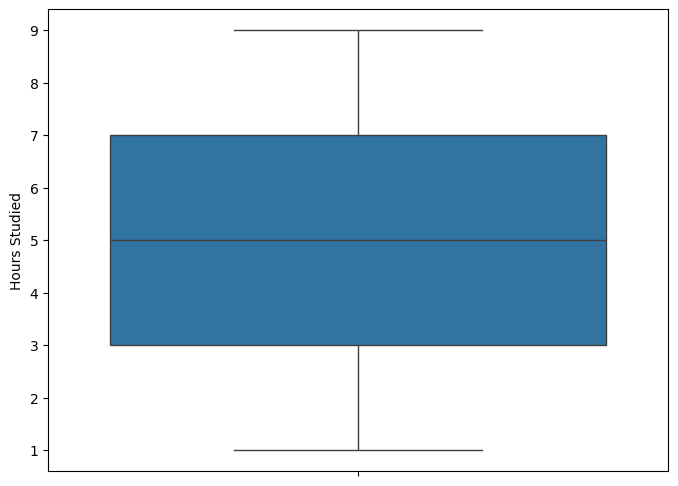

After Outlier Removing


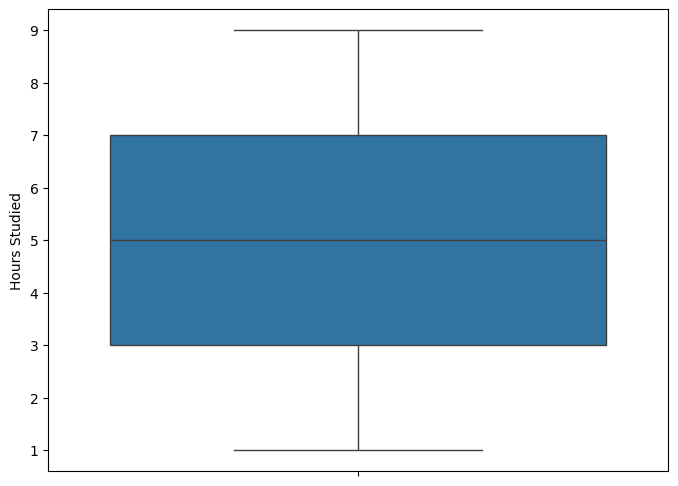

Before Outlier Removing


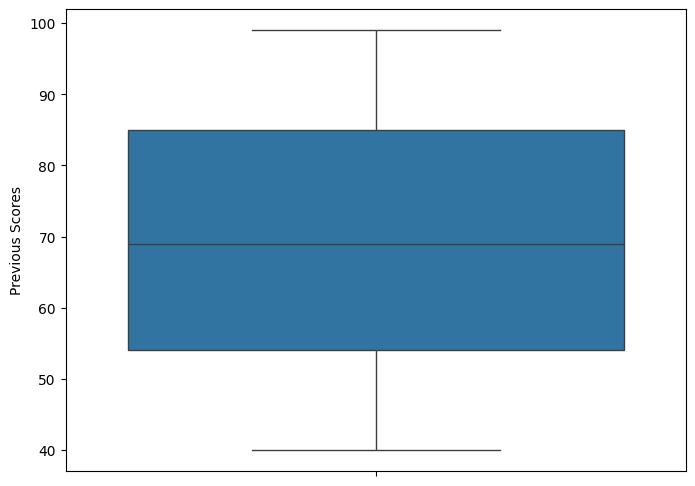

After Outlier Removing


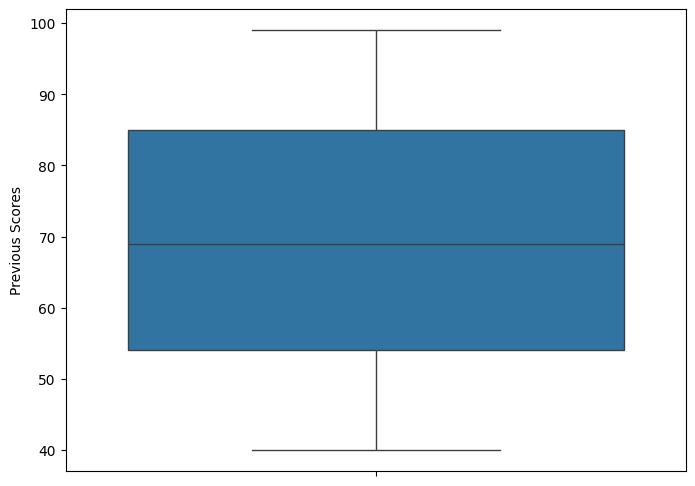

Before Outlier Removing


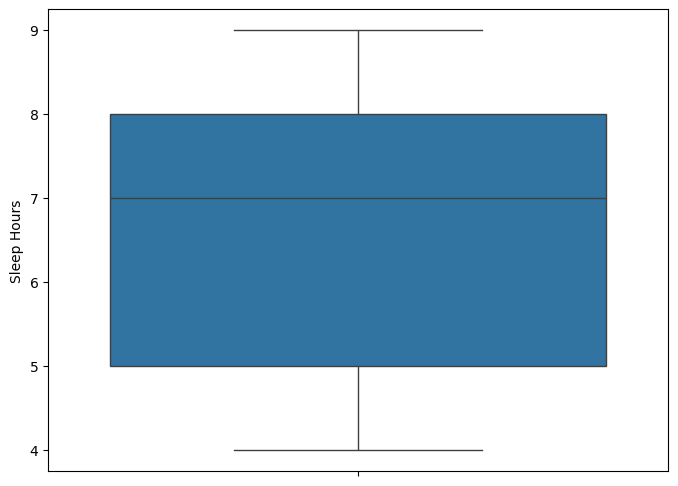

After Outlier Removing


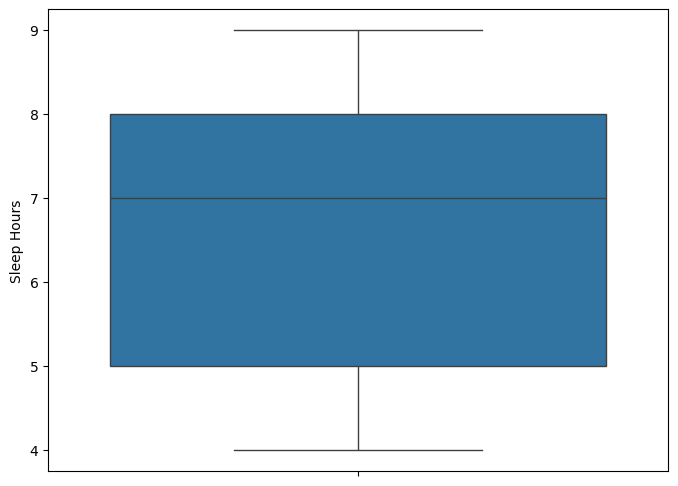

Before Outlier Removing


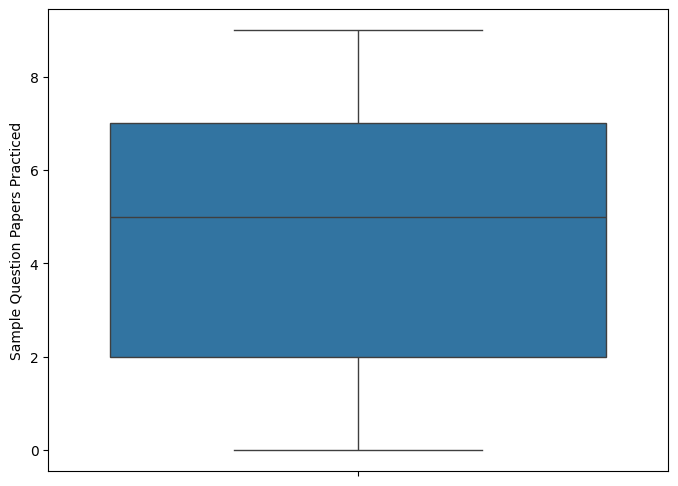

After Outlier Removing


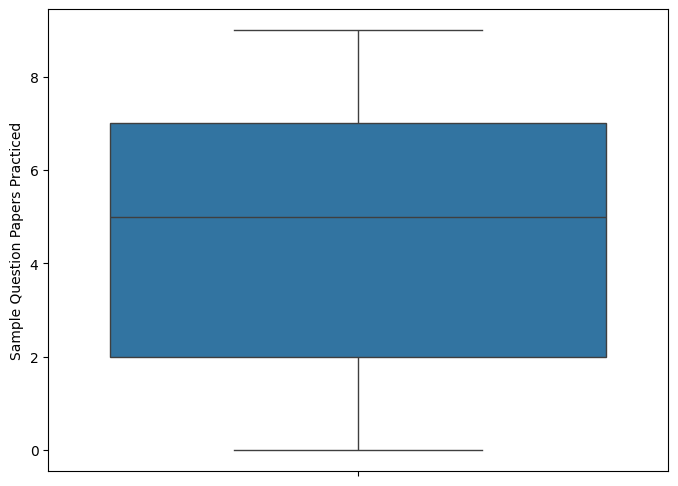

Before Outlier Removing


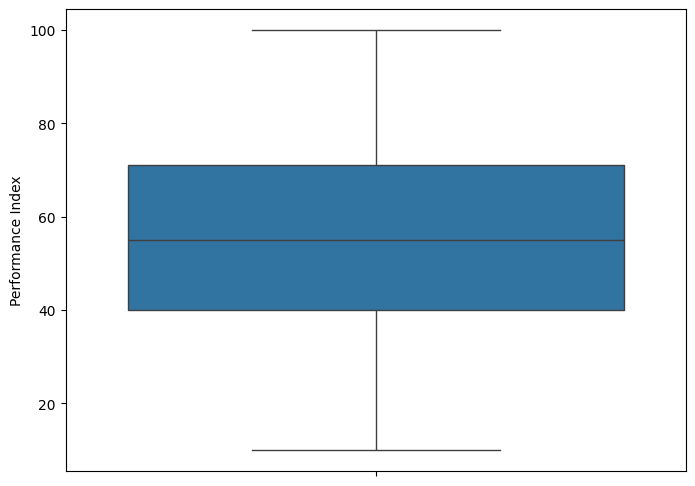

After Outlier Removing


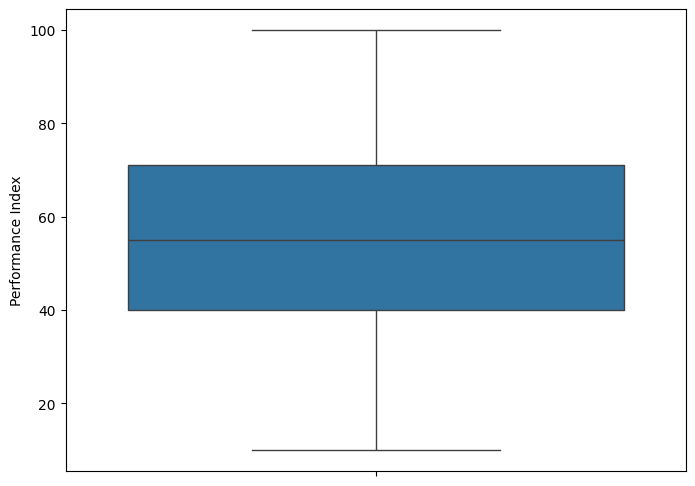

In [127]:
for column in numerical_columns:

    print("Before Outlier Removing")

    boxplot(column)

    print("After Outlier Removing")

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot(column)



In [128]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [129]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [130]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

Extracurricular Activities


In [131]:
encoding_mapping

{'Extracurricular Activities': {'No': 0, 'Yes': 1}}

In [132]:
encoding_mapping['Extracurricular Activities'] = {key.strip(): value for key, value in encoding_mapping['Extracurricular Activities'].items()}

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
X = data.drop(['Performance Index'], axis=1)
y = data['Performance Index']

In [135]:
X = scalerx.fit_transform(X)

In [136]:
y_array = y.values
y_reshaped = y_array.reshape(-1, 1)
y = scalery.fit_transform(y_reshaped)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

In [139]:
y_linear_pred

array([[-0.02669981],
       [-1.69737512],
       [-0.38110602],
       ...,
       [-2.0004261 ],
       [ 0.42258192],
       [-0.48315488]])

In [140]:
mse_lr = mean_squared_error(y_test, y_linear_pred)
r2_lr = r2_score(y_test, y_linear_pred)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.011061471626806863, R2: 0.9889832909573145


In [141]:
def val(column_name, target_key):
        return encoding_mapping[column_name].get(target_key)


In [142]:
hours = int(input("Hours Studied :"))
prev = int(input("Previous Scores :"))
extra = (input("Extracurricular Activities :(Yes/No)"))
sleep = int(input("Sleep Hours :"))
sample = int(input("Sample Question Papers Practiced :"))

Hours Studied :8
Previous Scores :89
Extracurricular Activities :(Yes/No)Yes
Sleep Hours :8
Sample Question Papers Practiced :7


In [143]:
extra = val('Extracurricular Activities',extra)

In [144]:
import numpy as np
inputs = np.array([hours,prev,extra,sleep,sample])

In [145]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [146]:
new_pred = linear_model.predict(new_inputs).reshape(-1,1)

In [147]:
n_pred = scalery.inverse_transform(new_pred)

In [148]:
print("Performance Index : ", n_pred[0][0] )

Performance Index :  85.17684357319553
